In [1]:
import pandas as pd

train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

In [2]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_set.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


OBSERVATION

the train_set.info() show that there aree 891 entries and a total of 12 columns.
All except Age, Cabin, and Embarked has no missing values. it also show the datatypes:

float ==> 2

int64 ==> 5

objects ==> 5

below also show the informations about the test set with 418 entries, 11 columns, the survivev column is not included here. test set also have missing values... Age, Fare, and Cabin

In [6]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
#lets look into the values of Embarked column
print(train_set['Embarked'].value_counts())
print('='*50)
print(test_set['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64
S    270
C    102
Q     46
Name: Embarked, dtype: int64


'S' appears to be the most occuring value followed by C, since our train_set have only 2 missing vaues lets replace the nan values with C

In [8]:
train_set['Embarked'].fillna('C', inplace=True)

In [9]:
train_set.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [10]:
print(train_set['Embarked'].value_counts())

S    644
C    170
Q     77
Name: Embarked, dtype: int64


In [11]:
train_age = train_set['Age'].mean()
test_age = test_set['Age'].mean()

train_set['Age'].fillna(train_age, inplace=True)
test_set['Age'].fillna(test_age, inplace=True)

In [12]:
train_set.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [13]:
test_set.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
test_fare = test_set['Fare'].median()
test_set['Fare'].fillna(test_fare, inplace=True)

In [15]:
print(train_set.isna().sum())
print('='*50)
print(test_set.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [16]:
#lets drop some irrelevant features

train_set_new = train_set.drop(['Name', 'Ticket', 'Cabin'], axis=1)
train_set_new.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [17]:
test_set_new = test_set.drop(['Name', 'Ticket', 'Cabin'], axis=1)
test_set_new.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [18]:

Train_set = train_set_new.drop(['Sex', 'Embarked'], axis=1)
cat = train_set_new[['Sex', 'Embarked']].copy()
#Train_set.head()

from sklearn.preprocessing import OrdinalEncoder
ordinal = OrdinalEncoder()

cat_tr = ordinal.fit_transform(cat)
cat_df = pd.DataFrame(cat_tr, columns=['Sex', 'Embarked'])

train_set = pd.concat([Train_set, cat_df], axis=1)
train_set.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,1,0,3,22.0,1,0,7.2500,1.0,2.0
1,2,1,1,38.0,1,0,71.2833,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,0.0,2.0
3,4,1,1,35.0,1,0,53.1000,0.0,2.0
4,5,0,3,35.0,0,0,8.0500,1.0,2.0


In [19]:
train_set.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
886,887,0,2,27.000000,0,0,13.00,1.0,2.0
887,888,1,1,19.000000,0,0,30.00,0.0,2.0
888,889,0,3,29.699118,1,2,23.45,0.0,2.0
889,890,1,1,26.000000,0,0,30.00,1.0,0.0
890,891,0,3,32.000000,0,0,7.75,1.0,1.0


In [20]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Sex          891 non-null    float64
 8   Embarked     891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


In [21]:
Test_set = test_set_new.drop(['Sex', 'Embarked'], axis=1)
cat_test = test_set_new[['Sex', 'Embarked']].copy()
#Train_set.head()

from sklearn.preprocessing import OrdinalEncoder
ordinal = OrdinalEncoder()

cat_tr1 = ordinal.fit_transform(cat_test)
cat_df1 = pd.DataFrame(cat_tr1, columns=['Sex', 'Embarked'])

test_set = pd.concat([Test_set, cat_df1], axis=1)
test_set.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,892,3,34.5,0,0,7.8292,1.0,1.0
1,893,3,47.0,1,0,7.0000,0.0,2.0
2,894,2,62.0,0,0,9.6875,1.0,1.0
3,895,3,27.0,0,0,8.6625,1.0,2.0
4,896,3,22.0,1,1,12.2875,0.0,2.0


In [22]:
corr_matrix = train_set.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.069809
Embarked      -0.174199
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64

In [23]:
train_set.shape

(891, 9)

In [24]:
test_set.shape

(418, 8)

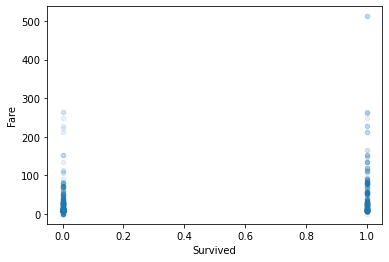

In [25]:
train_set.plot(kind='scatter', x='Survived', y='Fare', alpha=0.1)

In [26]:
from sklearn.model_selection import train_test_split
#to create a validation set, lets split our training set

Train_set, Val_set = train_test_split(train_set, test_size=0.2, random_state=0)


In [27]:
pass_Id = Train_set['PassengerId'].copy()
pass_Id_val = Val_set['PassengerId'].copy()
#Train set
X_train = Train_set.drop(['PassengerId', 'Survived'], axis=1)
y_train = Train_set['Survived'].copy()
#Validation set
X_val = Val_set.drop(['PassengerId', 'Survived'], axis=1)
y_val = Val_set['Survived'].copy()

In [28]:
print(X_train.shape)
print(X_val.shape)

(712, 7)
(179, 7)


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_val = scaler.transform(X_val)

# MODELS

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

log_clf = LogisticRegression()
sgd_clf = SGDClassifier()
svc_clf = SVC(kernel='rbf', gamma=10, C=10, probability=True)
tree_clf = DecisionTreeClassifier(random_state=0)
forest_clf = RandomForestClassifier(random_state=0)
#bagging_clf = BaggingClassifier(
        #forest_clf, n_estimators=500, max_samples=100, bootstrap=True,
        #n_jobs=-1)
#pasting_clf = BaggingClassifier(
        #forest_clf, n_estimators=500, max_samples=100, bootstrap=False,
        #n_jobs=-1)




In [31]:
#fitting the mdoels
for clf in (log_clf, sgd_clf, svc_clf, tree_clf, forest_clf):
    clf.fit(x_train, y_train)
#Training Accuracies
acc_score1 = f'{(log_clf.score(x_train, y_train)*100):.2f}%'
acc_score2 = f'{(sgd_clf.score(x_train, y_train)*100):.2f}%'
acc_score3 = f'{(svc_clf.score(x_train, y_train)*100):.2f}%'
acc_score4 = f'{(tree_clf.score(x_train, y_train)*100):.2f}%'
acc_score5 = f'{(forest_clf.score(x_train, y_train)*100):.2f}%'

training_accuracy = pd.DataFrame({'Model': ['LogisticRegression', 'SGDClassifier', 'SVC(kernel="rbf")', 'DecisionTree', 'RandomForestClassifier'],
                   'Training Accuracy': [acc_score1, acc_score2, acc_score3, acc_score4, acc_score5]})
training_acc_df = training_accuracy.sort_values(by='Training Accuracy', ascending=False)
training_acc_df.head()

,Model,Training Accuracy
3,DecisionTree,98.17%
4,RandomForestClassifier,98.17%
2,"SVC(kernel=""rbf"")",93.40%
0,LogisticRegression,79.78%
1,SGDClassifier,76.54%


In [32]:
#now lets check for the accuracy score on the validation set
from sklearn.metrics import accuracy_score

for clf in (log_clf, sgd_clf, svc_clf, tree_clf, forest_clf):
    #clf.fit(x_train, y_train)
    y_pred = clf.predict(x_val)
    print(clf.__class__.__name__, f'{(accuracy_score(y_val, y_pred)):.2f}%')

LogisticRegression 0.80%
SGDClassifier 0.76%
SVC 0.74%
DecisionTreeClassifier 0.79%
RandomForestClassifier 0.84%


#### The RandomForestClassifier performs fairly good on the Validation Set with 84% Accuracy Score.

In [33]:
#cross validation
from sklearn.model_selection import cross_val_score
forest_scores = cross_val_score(forest_clf, x_val, y_val, cv=5, scoring='accuracy').mean()

#output
print(f'RANDOMFORESTCLASSIFIER CROSS VALIDATION ACCURACY: {(forest_scores*100):.2f}%')

RANDOMFORESTCLASSIFIER CROSS VALIDATION ACCURACY: 81.59%


In [34]:
import joblib
joblib.dump(forest_clf, 'forest_clf_tit.pkl')

['forest_clf_tit.pkl']

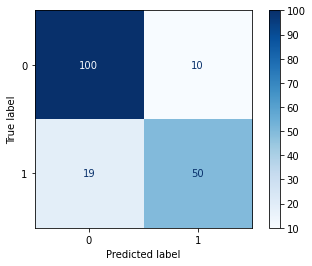

In [35]:
#plotting confusion matrix for RandomForest
from sklearn.metrics import plot_confusion_matrix
conf_mat = plot_confusion_matrix(forest_clf, x_val, y_val, cmap='Blues', values_format='d')

In [36]:
conf_mat.confusion_matrix

array([[100,  10],
       [ 19,  50]], dtype=int64)

from the confusion matrix:

above 100 people were correctly classified as not-survived, while 10 people were wrongly classified as survived.

19 people were wrongly classified as not-survived, while 50 were correctly classified as survived

In [37]:
y_val.value_counts()

0    110
1     69
Name: Survived, dtype: int64